#### Model Training

##### 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [81]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Import the CSV Data as Pandas DataFrame


In [82]:
# Reading a CSV file named 'data.csv' into a pandas DataFrame and assigning it to the variable 'df'
df = pd.read_csv('data.csv')  

Show Top 5 Records

In [83]:
# Displaying the first few rows of the DataFrame 'df'
df.head()  

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0.0,satisfied


Shape of the dataset

In [84]:
# Retrieving the dimensions of the DataFrame 'df'
df.shape 

(129880, 22)

#### Check Outliers

In [85]:
# Create list of features_to_scale_robust
features_to_scale_robust = ['Age', 'Flight Distance', 'Inflight wifi service',
                            'Departure/Arrival time convenient', 'Ease of Online booking',
                            'Gate location', 'Food and drink', 'Online boarding', 
                            'Seat comfort', 'Inflight entertainment', 'On-board service',
                            'Leg room service','Baggage handling', 'Checkin service', 
                            'Inflight service','Cleanliness', 'Arrival Delay in Minutes']

# Function to count outliers and remove them from the dataframe
def count_outliers(feature, df):
    # Calculate the quartiles and interquartile range (IQR)
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    # Calculate the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataframe to remove outliers based on the calculated bounds
    df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
    # Count the number of outliers
    num_outliers = ((feature < lower_bound) | (feature > upper_bound)).sum()
    return num_outliers, df_without_outlier

df_cleaned = df.copy()  # Create a copy of the original dataframe

total_outliers_deleted = 0  # Initialize variable to store the total number of deleted outliers

# Iterate through each feature
for feature in features_to_scale_robust:
    # Call count_outliers function to count outliers and get cleaned dataframe
    num_outliers, df_cleaned = count_outliers(df[feature], df_cleaned)
    print(f'Number of outliers in {feature}: {num_outliers}')  # Print the number of outliers for each feature
    total_outliers_deleted += num_outliers  # Add the number of outliers deleted for each feature

Number of outliers in Age: 0
Number of outliers in Flight Distance: 2855
Number of outliers in Inflight wifi service: 0
Number of outliers in Departure/Arrival time convenient: 0
Number of outliers in Ease of Online booking: 0
Number of outliers in Gate location: 0
Number of outliers in Food and drink: 0


C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reinde

Number of outliers in Online boarding: 0
Number of outliers in Seat comfort: 0
Number of outliers in Inflight entertainment: 0
Number of outliers in On-board service: 0
Number of outliers in Leg room service: 0
Number of outliers in Baggage handling: 0
Number of outliers in Checkin service: 16109
Number of outliers in Inflight service: 0


C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reinde

Number of outliers in Cleanliness: 0
Number of outliers in Arrival Delay in Minutes: 17492


C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]
C:\Users\abdu\AppData\Local\Temp\ipykernel_11700\535481572.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df[~((feature < lower_bound) | (feature > upper_bound))]


In [86]:
#check the total number of deleted outliers
print("Total number of deleted outliers is:", total_outliers_deleted)

Total number of deleted outliers is: 36456


What have we done?

In [87]:
#Check the amount of satisfied in df before dropping outliers
print ('The amount of satisfied in df before dropping outliers: ', len(df[df['satisfaction'] == 'satisfied']))
#Check the amount of satisfied in df after dropping outliers
print ('The amount of satisfied in df after dropping outliers: ', len(df_cleaned[df_cleaned['satisfaction'] == 'satisfied']))
#Check the amount of neutral or dissatisfied in df before dropping outliers
print ('The amount of  neutral or dissatisfied in df before dropping outliers: ', len(df[df['satisfaction'] == 'neutral or dissatisfied']))
#Check the amount of neutral or dissatisfied in df after dropping outliers
print ('The amount of  neutral or dissatisfied in df after dropping outliers: ', len(df_cleaned[df_cleaned['satisfaction'] == 'neutral or dissatisfied']))


The amount of satisfied in df before dropping outliers:  56428
The amount of satisfied in df after dropping outliers:  44861
The amount of  neutral or dissatisfied in df before dropping outliers:  73452
The amount of  neutral or dissatisfied in df after dropping outliers:  51572


By deleting outliers we dropped about 25% of the very important data! We shouldn't do that!

We have a few options here, but for that study we will just come back to the stage just before dropping outliers. 

Check Missing values

In [88]:
# Reading a CSV file named 'data.csv' into a pandas DataFrame and assigning it to the variable 'df'
df = pd.read_csv('data.csv')  

In [89]:
# Calculating the sum of missing values (NaN) for each column in the DataFrame 'df'
df.isna().sum() 

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [90]:
# Replace missing values in the 'Arrival Delay in Minutes' column with the calculated median value
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)


Check Zeros values

In [91]:
# Identifying cells where the value is equal to 0
missing = df.eq(0)  

# Summing up the occurrences of 0 for each column
display(missing.sum())  

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3916
Departure/Arrival time convenient     6681
Ease of Online booking                5682
Gate location                            1
Food and drink                         132
Online boarding                       3080
Seat comfort                             1
Inflight entertainment                  18
On-board service                         5
Leg room service                       598
Baggage handling                         0
Checkin service                          1
Inflight service                         5
Cleanliness                             14
Arrival Delay in Minutes             73146
satisfaction                             0
dtype: int64

Replace the null and Zeros Values

In [92]:
from sklearn.impute import SimpleImputer

# Calculate the median value of the 'Arrival Delay in Minutes' column
median_val = df['Arrival Delay in Minutes'].median()

# Replace missing values and values equal to 0 in the 'Arrival Delay in Minutes' column with the calculated median value
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median_val)

# List of columns containing '0' values that need to be replaced
columns_containing_zero = ['Inflight wifi service', 'Departure/Arrival time convenient', 
                           'Ease of Online booking', 'Gate location', 'Food and drink', 
                           'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                           'On-board service', 'Leg room service', 'Checkin service', 
                           'Inflight service', 'Cleanliness']

# Replace '0' values in each column with NaN
df[columns_containing_zero] = df[columns_containing_zero].replace({0: np.nan})

# Create a SimpleImputer object with 'most_frequent' strategy to replace missing values with mode
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data and transform the columns containing missing values and '0' values
df[columns_containing_zero] = imputer.fit_transform(df[columns_containing_zero])


check zeros again

In [93]:
# Identifying cells where the value is equal to 0
missing = df.eq(0)  

# Summing up the occurrences of 0 for each column
display(missing.sum())  

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                    0
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Food and drink                           0
Online boarding                          0
Seat comfort                             0
Inflight entertainment                   0
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                          0
Inflight service                         0
Cleanliness                              0
Arrival Delay in Minutes             73146
satisfaction                             0
dtype: int64

Encoding

In [94]:
# Mapping 'Gender' column values to numeric values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Mapping 'Customer Type' column values to numeric values
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})

# Mapping 'Type of Travel' column values to numeric values
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})

# Mapping 'Class' column values to numeric values
df['Class'] = df['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})

# Mapping 'satisfaction' column values to numeric values
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})


Preparing X and Y variables

In [95]:
# independent and dependent features
X = df.drop('satisfaction',axis=1) #df.iloc[:,:-1]
y = df['satisfaction'] # df.iloc[:,-1]

Train Test split

In [96]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X: features, y: target variable
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=0: setting the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [97]:
print('Satisfaction class distribution')
print(y.value_counts())

print('y_train class distribution')
print(y_train.value_counts())

print('y_test class distribution')
print(y_test.value_counts())

Satisfaction class distribution
satisfaction
0    73452
1    56428
Name: count, dtype: int64
y_train class distribution
satisfaction
0    58795
1    45109
Name: count, dtype: int64
y_test class distribution
satisfaction
0    14657
1    11319
Name: count, dtype: int64


In [98]:
# Printing the shapes of the feature matrices for the entire dataset, testing set, and training set
print(X.shape, X_test.shape, X_train.shape)


(129880, 21) (25976, 21) (103904, 21)


Data Standarization

In [99]:
# Importing the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Instantiating a StandardScaler object
scaler = StandardScaler()

# Scaling (standardizing) the features in the training set
X_train = scaler.fit_transform(X_train)

# Scaling (standardizing) the features in the testing set
X_test = scaler.transform(X_test)


#### Training the Model

1. K Nearest Neighbors


In [100]:
# Importing the KNeighborsClassifier class from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instantiating a KNeighborsClassifier object with specified parameters
knn = KNeighborsClassifier()

# Fitting the K-nearest neighbors model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

2. xgboost

In [101]:
# Importing the XGBClassifier class from xgboost
from xgboost import XGBClassifier

# Instantiating an XGBClassifier object
xgb = XGBClassifier()

# Fitting the XGBoost model to the training data
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

3. Decision Tree

In [102]:
# Importing the DecisionTreeClassifier class from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiating a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Fitting the decision tree model to the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier()

4. Random Forest

In [103]:
# Importing the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Instantiating a RandomForestClassifier object
rf = RandomForestClassifier()

# Fitting the random forest model to the training data
rf.fit(X_train, y_train)


RandomForestClassifier()

Models objects and names

In [104]:
# Define models list
models = [knn,xgb,dt,rf]
# List of model names
models_names = [ "K-Nearest Neighbors", "XGBoosting", "Support Vector Machine", "Decision Tree", "Random Forest"]

### Assess the complexity of each model

In [105]:
def assess_model_complexity(model):
    num_parameters = model._get_param_names()  # Get the names of the parameters
    computational_complexity = "High" if hasattr(model, "decision_function") else "Low"  # Check if the model has a decision function
    interpretability = "High" if hasattr(model, "feature_importances_") else "Low"  # Check if the model has feature importances
    return num_parameters, computational_complexity, interpretability

In [106]:
# Initialize an empty list to store the rows of the table
table_data = []

# Populate the table data with the complexity assessment for each model
for model, model_name in zip(models, models_names):
    num_parameters, computational_complexity, interpretability = assess_model_complexity(model)
    table_data.append([model_name, len(num_parameters), computational_complexity, interpretability])

# Define the headers for the table
headers = ["Model", "Num Parameters", "Computational Complexity", "Interpretability"]

# Convert the table data to a DataFrame
df = pd.DataFrame(table_data, columns=headers)

# Print the DataFrame
display(df)


,Model,Num Parameters,Computational Complexity,Interpretability
0,K-Nearest Neighbors,8,Low,Low
1,XGBoosting,1,Low,High
2,Support Vector Machine,12,Low,High
3,Decision Tree,18,Low,High


#### Plot Feature Importance

In [107]:
# Define a function to plot feature importance
def plot_feature_importance(model, feature_names, ax=None):
    # Get feature importances and sort them
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Plot feature importance
    ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

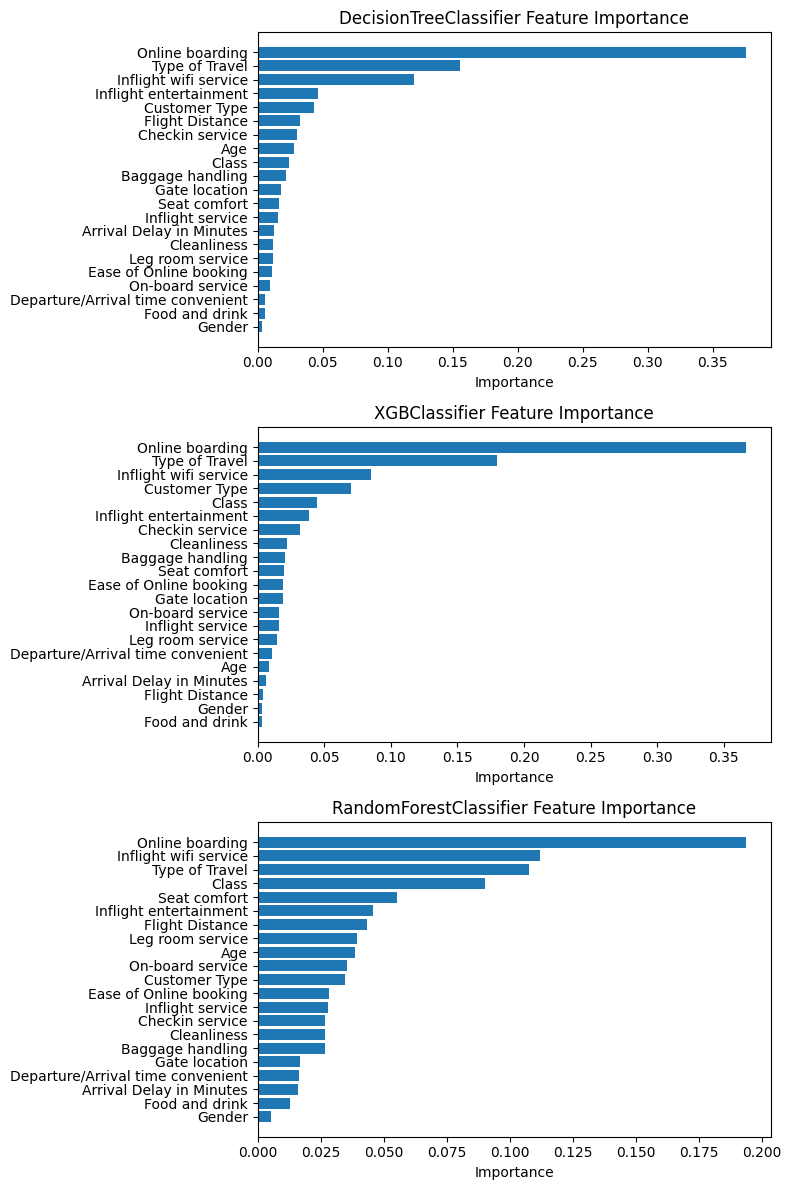

In [108]:
# Plot visualizations for each model
feature_importance_models = [dt,xgb,rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(feature_importance_models):
       plot_feature_importance(model, X.columns, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} Feature Importance")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Plot Learning Curve

In [109]:
# Import necessary functions/classes from sklearn
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X_train, y_train, cv=None, n_jobs=-1, ax=None):
    # Generate learning curves using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs)
    # Compute mean and standard deviation of training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    # Compute mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()
    
    # Fill the area between the training score curves
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    # Fill the area between the test score curves
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    # Plot the training score curve
    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    # Plot the cross-validation score curve
    ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    # Set title of the plot
    ax.set_title(title)
    # Set label for x-axis
    ax.set_xlabel("Training examples")
    # Set label for y-axis
    ax.set_ylabel("Score")
    # Add legend to the plot
    ax.legend(loc="best")


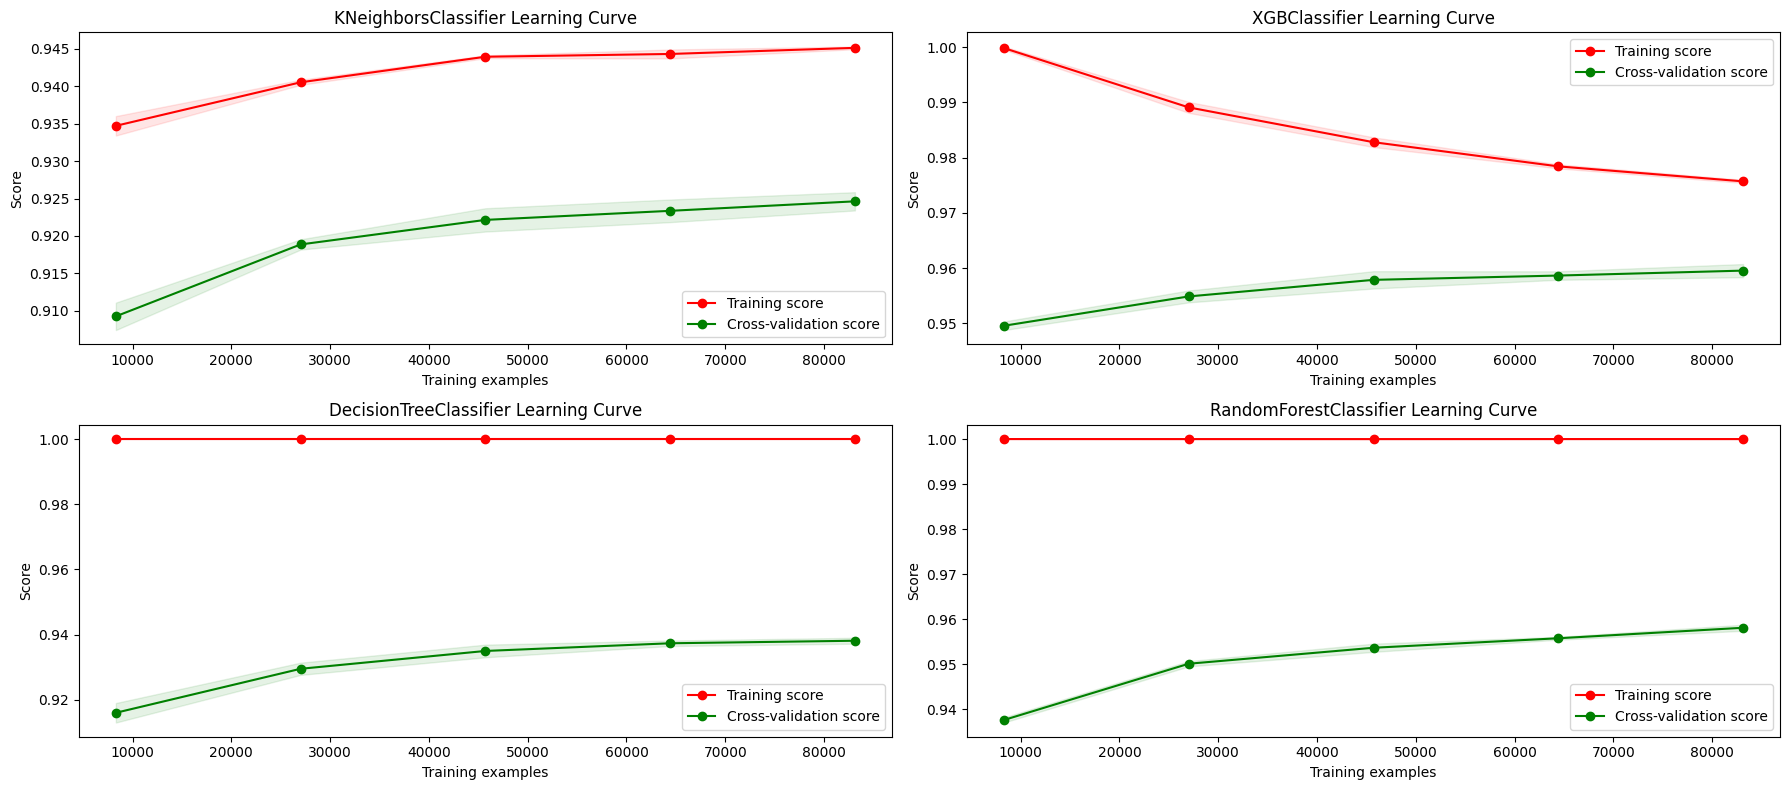

In [110]:
# Define the layout of the grid
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
    plot_learning_curve(model, f"{model.__class__.__name__} Learning Curve", X_train, y_train, cv=5, ax=axes[i])

    # Set title for each subplot
    axes[i].set_title(f"{model.__class__.__name__} Learning Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Evaluation Metrics
#### Confusion Matrix, accuracy, precision, recall, f1 score

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

# Define a function to compute specificity
def specificity_score(y_true, y_pred):
    # Compute confusion matrix and unpack values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Compute specificity 
    specificity = tn / (tn + fp)
    return specificity

# Define a function to compute evaluation metrics for all models
def evaluate_all_models(models, X_test, y_test):
    # Define lists to store evaluation metrics for test sets
    models_confusion_matrix = []
    models_metrics = []

    # Loop through each model
    for model in models:
        # Compute evaluation metrics for the model
        model_metrics = compute_evaluation_metrics(model, X_test, y_test)
        
        # Append insights to the respective lists
        models_metrics.append(model_metrics)

    # Create DataFrame for test sets
    models_metrics_df = pd.DataFrame(models_metrics)

    # Select columns for the Confusion matrix DataFrame
    cm_columns_to_select = ["Model", "Confusion Matrix", "TP", "FP", "TN", "FN"]

    # Select columns for the metrics DataFrame
    metrics_columns_to_select = ["Model", "Accuracy", "Precision", "Recall/sensitivity", "Specificity", "F1-score"]

    return models_metrics_df[cm_columns_to_select], models_metrics_df[metrics_columns_to_select]

# Define a function to compute evaluation metrics for a single model
def compute_evaluation_metrics(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract TP, FP, TN, FN from confusion matrix
    tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix
    
    # Compute evaluation metrics for test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)  # Calculate specificity
    f_score = f1_score(y_test, y_pred)
    
    # Store confusion matrix and metrics df
    metrics = {
        "Model": model.__class__.__name__,
        "Confusion Matrix": cm,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall/sensitivity": recall,
        "Specificity": specificity,
        "F1-score": f_score,
       
    }
    
    return metrics



Plot Confusion Meatrix


In [112]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix for all the models
def plot_confusion_matrix(models_names, models_cm):
    
    # Plot confusion matrices for each model in a grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a 2x3 grid of subplots
    for i, title in enumerate(models_names):  # Iterate over models
        row = i // 2  # Calculate row index
        col = i % 2  # Calculate column index
        ax = axes[row, col]
        # Plot confusion matrix
        sns.heatmap(models_cm[i], annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)  # Plot heatmap with annotations
        ax.set_xlabel('Predicted labels')  # Set x-axis label
        ax.set_ylabel('Actual labels')  # Set y-axis label
        ax.set_title(title)  # Set title

    plt.tight_layout()  # Adjust subplot layout to make plots fit into the figure area
    plt.show()  # Show the plots

## Evaluate the models before parameters tuning

In [113]:
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

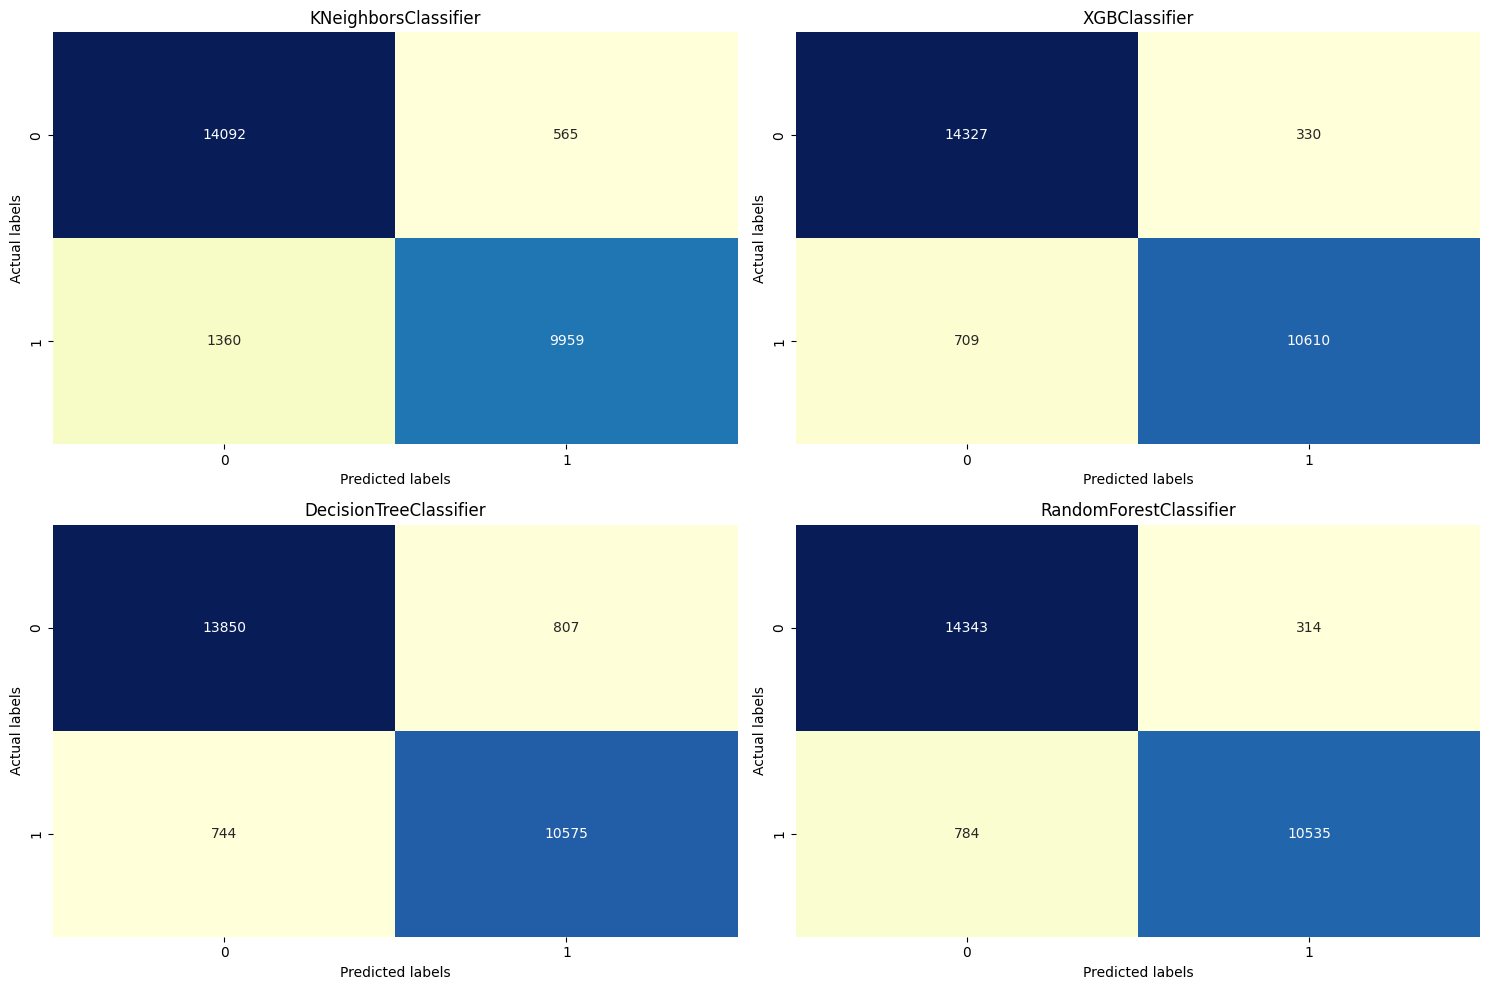

In [114]:
#Plot Confusion Matrix
plot_confusion_matrix(models_cm_df["Model"], models_cm_df["Confusion Matrix"])

In [115]:
# Display the confusion matrix
print("\nConfusion Matrix before tuning:")
display(models_cm_df[["Model", "TP", "FP", "TN", "FN"]])


Confusion Matrix before tuning:


,Model,TP,FP,TN,FN
0,KNeighborsClassifier,9959,565,14092,1360
1,XGBClassifier,10610,330,14327,709
2,DecisionTreeClassifier,10575,807,13850,744
3,RandomForestClassifier,10535,314,14343,784


In each cell, "TP" represents True Positives, "FP" represents False Positives, and "FN" represents False Negatives. "TN" represents True Negatives. These values are filled in for both the neutral or dissatisfied and satisfied classes for each model.

In [116]:
# Display the performance metrics DataFrame
print("\nTest Set Evaluation Metrics before tuning:")
display(models_metrics_df)


Test Set Evaluation Metrics before tuning:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score
0,KNeighborsClassifier,0.925893,0.946313,0.879848,0.961452,0.911871
1,XGBClassifier,0.960002,0.969835,0.937362,0.977485,0.953322
2,DecisionTreeClassifier,0.940291,0.929099,0.934270,0.944941,0.931677
3,RandomForestClassifier,0.957730,0.971057,0.930736,0.978577,0.950469


ROC Curve

In [117]:
# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, ax=None):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    # Plot the diagonal dashed line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Set limits for x-axis
    ax.set_xlim([0.0, 1.0])
    # Set limits for y-axis
    ax.set_ylim([0.0, 1.05])
    # Set label for x-axis
    ax.set_xlabel('False Positive Rate')
    # Set label for y-axis
    ax.set_ylabel('True Positive Rate')
    # Set title of the plot
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    # Add legend to the plot
    ax.legend(loc="lower right")



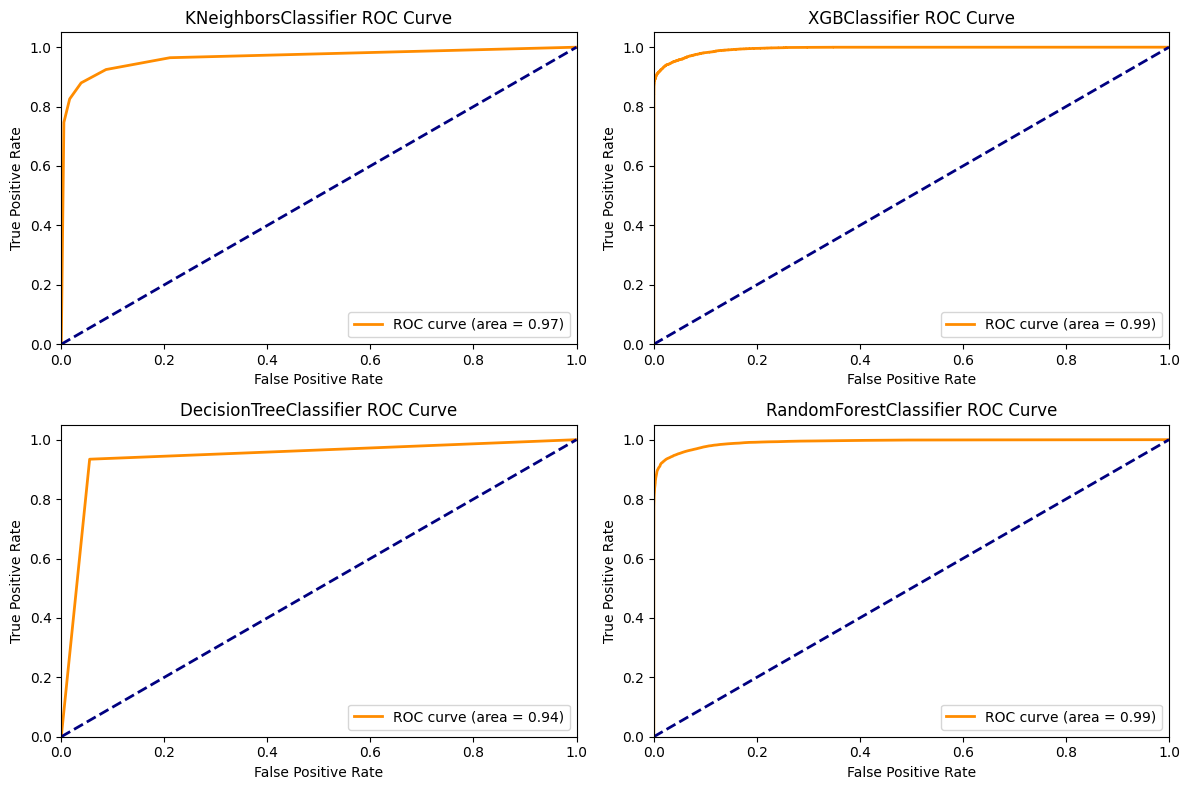

In [118]:
# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
       plot_roc_curve(model, X_test, y_test, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} ROC Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Best Model


In [123]:
# Predict the target labels for the test set using the trained XGBoost model
y_pred = xgb.predict(X_test)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
score = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the model, formatted to display two decimal places
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 96.00


Save Best Model in File

In [125]:
# Import the pickle module for serializing and deserializing Python objects
import pickle

# Assign the xgb model to the variable selected_model
selected_model = xgb

# Serialize and save the selected_model object to a binary file named 'best_model.pkl'
pickle.dump(selected_model, open('../../../../best_model.pkl', 'wb+'))

# Serialize and save the scaler object to a binary file named 'scaler.pkl'
pickle.dump(scaler, open('../../../../scaler.pkl', 'wb+'))
